$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [4]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code to compute step length
  step_length = np.dot(gradf,gradf)/np.dot(gradf,np.matmul(2*A,gradf))

  
  return step_length

In [16]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p=-evalg(x)
  #implement the backtracking line search
  while evalf(x+alpha*p)>evalf(x)+gamma*alpha*np.dot(evalg(x),p):
    alpha = rho*alpha

  #print('final step length:',alpha)
  return alpha

In [17]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [18]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x , k , evalf(x) 


Ques 3.

In [19]:

my_start_x = np.array([1,1])
my_tol= 1e-5


x_opt , k , minimum = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print("Final minimizer for constant step length is :",x_opt)
print("Number of iterations are :",k)
print("Minimum function value is :",minimum)


Final minimizer for constant step length is : [  7.99999775 -11.99999582]
Number of iterations are : 67
Minimum function value is : 2.2517218946096954e-11


In [22]:
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls , k , minimum = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Final minimizer for backtracking line search is :",x_opt_bls)
print("Number of iterations are :",k)
print("Minimum function value is :",minimum)


Final minimizer for backtracking line search is : [  8. -12.]
Number of iterations are : 1
Minimum function value is : 0.0


Ques 4.

In [25]:
tolerance = 10**(-12)
start_x  = np.array([25,25])
x_opt , k , minimum = find_minimizer(start_x, tolerance, EXACT_LINE_SEARCH)
print("Number of iterations using exact line search :",k)

Number of iterations using exact line search : 1


In [27]:
x_opt_bls , k , minimum = find_minimizer(start_x, tolerance, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Number of iterations using backtracking line search :",k)


Number of iterations using backtracking line search : 1


Observation :
We get the same number of iterations i.e., = 1 using both the methods.

Ques 5.

In [29]:
alpha_values = [1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
tolerance = 10**(-10)
gamma = 0.5
rho = 0.5
final_minimizer = []
final_value = []
iterations_bls = []

In [30]:
for alpha in alpha_values:
  minimizer , iteration , minimum = find_minimizer(start_x, tolerance, BACKTRACKING_LINE_SEARCH, alpha, 0.5,0.5)
  final_minimizer.append(minimizer)
  final_value.append(minimum)
  iterations_bls.append(iteration)

In [37]:
print("Final minimizer values ",final_minimizer )
print("Final Function values",final_value)
print("Number of iterations :",iterations_bls)

Final minimizer values  [array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.])]
Final Function values [0.0, 1.6579714975258972e-21, 1.3714654556129199e-21, 2.2038291998576117e-21, 0.0, 1.1393259623274523e-22, 1.3714654556129199e-21, 2.3972320602008796e-21, 2.4523367712209537e-21]
Number of iterations : [1, 12, 20, 30, 1, 18, 40, 123, 1358]


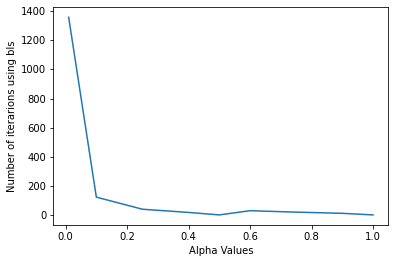

In [33]:
#plotting
import matplotlib.pyplot as plt
plt.plot(alpha_values,iterations_bls)
plt.xlabel("Alpha Values")
plt.ylabel("Number of iterarions using bls")
plt.show()

In [39]:
iterations_exact=[]
for alpha in alpha_values:
    minimizer , iteration , minimum = find_minimizer(start_x, tolerance, EXACT_LINE_SEARCH, alpha, 0.5,0.5)
    iterations_exact.append(iteration)
iterations_exact    

[1, 1, 1, 1, 1, 1, 1, 1, 1]

Observation: \\
We don't have any value of alpha for which the backtracking linesearch method take lesser number of iterations than the exact line search method.

Ques 6.

In [40]:
rho_values = [0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
alpha = 1
gamma = 0.5
final_minimizer = []
final_value = []
iterations_bls = []
for rho in rho_values:
  minimizer , iteration , minimum = find_minimizer(start_x, tolerance, BACKTRACKING_LINE_SEARCH, alpha,rho,gamma)
  final_minimizer.append(minimizer)
  final_value.append(minimum)
  iterations_bls.append(iteration)

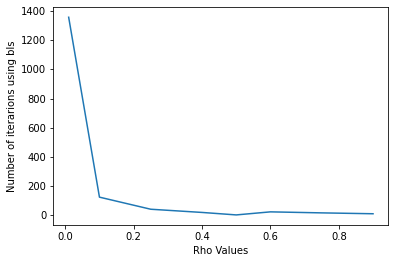

In [41]:
#plotting
plt.plot(rho_values,iterations_bls)
plt.xlabel("Rho Values")
plt.ylabel("Number of iterarions using bls")
plt.show()

Observation : \\
As we decrease the value of rho from 0.9 to almost 0.1 , number of iterations don't increase that rapidly but on decreasing the rho from 0.1 onwards there is a rapid increment in number of iterations 

In [42]:
print("Final minimizer values ",final_minimizer )
print("Final Function values",final_value)
print("Number of iterations :",iterations_bls)

Final minimizer values  [array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.])]
Final Function values [4.960536411900771e-22, 1.0819468296335504e-21, 7.844395544174143e-22, 0.0, 1.1393259623274523e-22, 1.3714654556129199e-21, 2.3972320602008796e-21, 2.4523367712209537e-21]
Number of iterations : [9, 15, 22, 1, 18, 40, 123, 1358]


Observation : \\
We don't see any major change in the final function value and final minimizer w.r.t. change in rho values.

In [43]:
iterations_exact=[]
for rho in rho_values:
    minimizer , iteration , minimum = find_minimizer(start_x, tolerance, EXACT_LINE_SEARCH, alpha,rho,gamma)
    iterations_exact.append(iteration)
iterations_exact   

[1, 1, 1, 1, 1, 1, 1, 1]

Observation: \\
We don't have any value of rho for which the backtracking linesearch method take lesser number of iterations than the exact line search method